<a href="https://colab.research.google.com/github/yehuda-yu/Image_processing/blob/main/Cleaning_noisy_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import the packages

In [1]:
from skimage import io, filters, feature
import matplotlib.pyplot as plt
from skimage import color
from skimage import data, io, img_as_ubyte
from skimage.filters import threshold_multiotsu
from skimage.color import rgb2gray
from skimage.color import gray2rgb
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Select image and present it

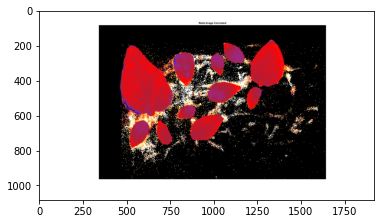

In [3]:
path_to_image = "/content/C-2-2.tif"
image = io.imread(path_to_image)
plt.imshow(image,cmap='gray')

# Multi-Otsu threshold

/usr/local/lib/python3.7/dist-packages/skimage/util/dtype.py:531: UserWarning: Downcasting int64 to uint8 without scaling because max value 2 fits in uint8
  return _convert(image, np.uint8, force_copy)


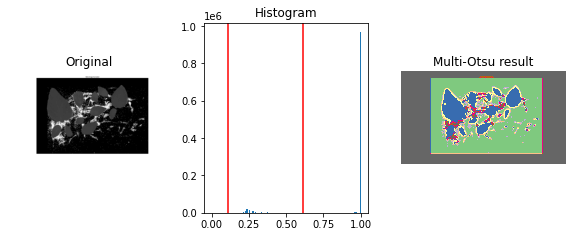

In [4]:
# https://github.com/bnsreenu/python_for_image_processing_APEER/blob/master/tutorial24_saving_images_in_python.py


# Read an image
image = color.rgb2gray(image)

# Apply multi-Otsu threshold 
thresholds = threshold_multiotsu(image, classes=3)

# Digitize (segment) original image into multiple classes.
#np.digitize assign values 0, 1, 2, 3, ... to pixels in each class.
regions = np.digitize(image, bins=thresholds)
output = img_as_ubyte(regions)  #Convert 64 bit integer values to uint8



#Let us look at the input image, thresholds on thehistogram and final segmented image
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 3.5))

# Plotting the original image.
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')

# Plotting the histogram and the two thresholds obtained from
# multi-Otsu.
ax[1].hist(image.ravel(), bins=255)
ax[1].set_title('Histogram')
for thresh in thresholds:
    ax[1].axvline(thresh, color='r')

# Plotting the Multi Otsu result.
ax[2].imshow(regions, cmap='Accent')
ax[2].set_title('Multi-Otsu result')
ax[2].axis('off')

plt.subplots_adjust()

plt.show()

#### Now my purpose is to:
1. Take the output image and keep just the leaves.Their value will be 1 and other pixels will be Zero.

2. Multiple **the origin image** with the new image. all the pixels that not belong to the leaves will be zero and the leaves will be the origin value so we will stay with this.

In [5]:
print("values are :",np.unique(regions))
regions[regions==2] = 0 #not leaves will be 0
print("values are :",np.unique(regions))

values are : [0 1 2]
values are : [0 1]


I want to save the original values of all pixel 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  


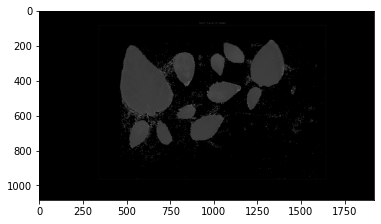

In [6]:
from skimage.color import gray2rgb
img_gray = rgb2gray(image)
filtered = img_gray*regions
filtered = gray2rgb(filtered)
plt.imshow(filtered)

Another salt and peper cleaning with gaussian
(more info [here](https://www.youtube.com/watch?v=g-1bTTNOZa0))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  """


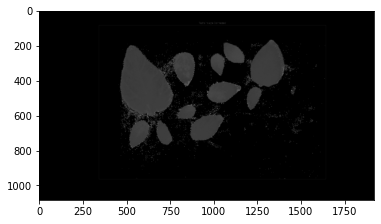

In [7]:
# filtered_gray = rgb2gray(filtered)
from skimage import io, img_as_float
from skimage.filters import gaussian
img_salt_pepper_noise = img_as_float(filtered)
gaussian_using_skimage = gaussian(img_salt_pepper_noise, sigma=1, mode='constant', cval=0.0)
plt.imshow(gaussian_using_skimage)

## Convert to CSV

In [23]:
import pandas as pd
import numpy as np
gray_filtered = rgb2gray(filtered)
# create a dummy array
arr = gray_filtered
  
# display the array
print(arr)
  
# convert array into dataframe

DF = pd.DataFrame(arr)
  
# save the dataframe as a csv file
DF.to_csv("/content/test.csv")

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
